In [2]:

import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display
# from JSAnimation.IPython_display import display_animation
%matplotlib inline

def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1]/72.0,frames[0].shape[0]/72.0),dpi=72.0)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(framesmes[i])
    anim=animation.FuncAnimation(plt.gcf(),animate,frames=len(frames),interval=50)
    anim.save('movie_cartpole.mp4')
    display(display_animation(anim,default_mode='loop'))

frames = []
#     frames.append(env.render(mode='rgb_array'))



In [205]:
    action = np.random.choice(2)
    observation,reward,done,info = env.step(action) #返回状态(observation),奖励（reward），
    env.render()
    done

True

In [3]:
ENV = 'CartPole-v0'
NUM_DIZITIZED = 6
GAMMA = 0.99
ETA = 0.5
MAX_STEPS = 200      
NUM_EPISODES = 1000
epsilon = 1  

def bins(clip_min,clip_max,num):
    return np.linspace(clip_min,clip_max,num+1)[1:-1]

def digitize_state(observation):  
    """
    6分离散化，状态值从0到1295，共1296个状态"""
    cart_pos,cart_v,pole_angel,pole_v=observation
    digitized = [
        np.digitize(cart_pos,bins = bins(-2.4,2.4,NUM_DIZITIZED)),
        np.digitize(cart_v,bins = bins(-3.0,3.0,NUM_DIZITIZED)),
        np.digitize(cart_pos,bins = bins(-0.5,0.5,NUM_DIZITIZED)),
        np.digitize(cart_pos,bins = bins(-2.0,2.0,NUM_DIZITIZED)),
    ]
    return sum([x*(NUM_DIZITIZED ** i) for i,x in enumerate(digitized)])
env = gym.make("CartPole-v0")

In [51]:
    cart_pos,cart_v,pole_angle,pole_v=env.reset()
    digitized = [
        np.digitize(cart_pos,bins = bins(-2.4,2.4,NUM_DIZITIZED)),
        np.digitize(cart_v,bins = bins(-3.0,3.0,NUM_DIZITIZED)),
        np.digitize(pole_angle,bins = bins(-0.5,0.5,NUM_DIZITIZED)),
        np.digitize(pole_v,bins = bins(-2.0,2.0,NUM_DIZITIZED)),
    ]
    digitized

[2, 3, 2, 3]

In [60]:
env.action_space.

RandomState(MT19937) at 0x21E1BDDBAE8

In [5]:
class Agent:
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)    #定义Brain类

    def update_Q_function(self, observation, action, reward, observation_next):
        """
        执行update_Q_table
        """
        self.brain.update_Q_table(observation, action, reward, observation_next)

    def get_action(self, observation, step):
        """
        执行action"""
        action = self.brain.decide_action(observation, step)
        return action


class Brain:
    def __init__(self, num_states, num_actions):
        self.num_actions = num_actions
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIZITIZED**num_states, num_actions))

    def bins(self,clip_min, clip_max, num):
        return np.linspace(clip_min, clip_max, num+1)[1:-1]

    def digitize_state(self, observation):
        """
        observation初始状态
        6分离散化，状态值从0到1295，共1296个状态
        """
        cart_pos, cart_v, pole_angle, pole_v = observation
        digitized = [
            np.digitize(cart_pos, bins=self.bins(-2.4, 2.4, NUM_DIZITIZED)),
            np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIZITIZED)),
            np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIZITIZED)),
            np.digitize(pole_v, bins=self.bins(-2.0, 2.0, NUM_DIZITIZED)),
        ]
        return sum([x*(NUM_DIZITIZED ** i) for i, x in enumerate(digitized)])

    def update_Q_table(self, observation, action, reward, observation_next):
        """
        Q学习更新价值表（Q[state，action])
        """
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        Max_Q_next = max(self.q_table[state_next][:])
        self.q_table[state, action] = self.q_table[state, action] + \
                    ETA*(reward+GAMMA*Max_Q_next-self.q_table[state, action])

    def decide_action(self, observation, episode):
        """选择Q值最大的或随机选择"""
        state = self.digitize_state(observation)
        epsilon = 0.5*(1/(episode+1))

        if epsilon <= np.random.uniform(0, 1):
            action = np.argmax(self.q_table[state][:])
        else:
            action = np.random.choice(self.num_actions)

        return action

class Environment:
    def __init__(self):  
        self.env = gym.make(ENV)
        num_states = self.env.observation_space.shape[0]      #
        num_actions = self.env.action_space.n
        self.agent = Agent(num_states, num_actions)

    def run(self):
        complete_episodes = 0
        is_episode_final = False    #是否是最后一轮
        frames = []
        for episode in range(NUM_EPISODES):
            observation = self.env.reset()
            """reset只返回observation，step返回observation,action,info等信息
            """
            for step in range(MAX_STEPS):
                """
                指定单次循环
                env.render对数学模型没有影响，仅仅是用来可视化
                """
                if is_episode_final is True:
                    frames.append(self.env.render(mode='rgb_array'))
                    
                action = self.agent.get_action(observation, episode)    # 动作
                observation_next, _, done, _ = self.env.step(action)  # 执行action，并返回动作后的状态

                if done:
                    if step < 195:      
                        reward = -1
                        complete_episodes = 0
                    else:
                        reward = 1
                        complete_episodes += 1
                else:
                    reward = 0
                self.agent.update_Q_function(observation, action, reward, observation_next)
                observation = observation_next    
                if done:
                    print('{0} Episode:Finished after {1} time steps'.format(episode, step+1))
                    break

            if is_episode_final is True:
                display_frames_as_gif(frames)
                break
                
            if complete_episodes >= 10:
                print('10回合连续成功')
                is_episode_final = True     #成功超过10次后，在执行最后一次循环
                


0 Episode:Finished after 26 time steps
1 Episode:Finished after 13 time steps
2 Episode:Finished after 9 time steps
3 Episode:Finished after 12 time steps
4 Episode:Finished after 19 time steps
5 Episode:Finished after 110 time steps
6 Episode:Finished after 47 time steps
7 Episode:Finished after 10 time steps
8 Episode:Finished after 83 time steps
9 Episode:Finished after 9 time steps
10 Episode:Finished after 39 time steps
11 Episode:Finished after 46 time steps
12 Episode:Finished after 31 time steps
13 Episode:Finished after 50 time steps
14 Episode:Finished after 46 time steps
15 Episode:Finished after 18 time steps
16 Episode:Finished after 51 time steps
17 Episode:Finished after 42 time steps
18 Episode:Finished after 18 time steps
19 Episode:Finished after 42 time steps
20 Episode:Finished after 18 time steps
21 Episode:Finished after 17 time steps
22 Episode:Finished after 40 time steps
23 Episode:Finished after 43 time steps
24 Episode:Finished after 13 time steps
25 Episode:

202 Episode:Finished after 200 time steps
203 Episode:Finished after 200 time steps
204 Episode:Finished after 200 time steps
205 Episode:Finished after 200 time steps
206 Episode:Finished after 200 time steps
207 Episode:Finished after 200 time steps
208 Episode:Finished after 200 time steps
209 Episode:Finished after 200 time steps
210 Episode:Finished after 191 time steps
211 Episode:Finished after 200 time steps
212 Episode:Finished after 200 time steps
213 Episode:Finished after 187 time steps
214 Episode:Finished after 200 time steps
215 Episode:Finished after 200 time steps
216 Episode:Finished after 200 time steps
217 Episode:Finished after 200 time steps
218 Episode:Finished after 200 time steps
219 Episode:Finished after 200 time steps
220 Episode:Finished after 193 time steps
221 Episode:Finished after 194 time steps
222 Episode:Finished after 200 time steps
223 Episode:Finished after 158 time steps
224 Episode:Finished after 200 time steps
225 Episode:Finished after 162 tim

MovieWriter ffmpeg unavailable; using Pillow instead.


277 Episode:Finished after 200 time steps


IndexError: list index out of range

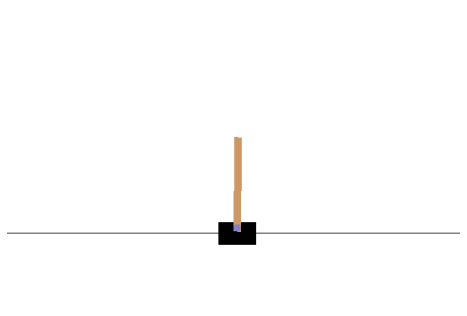

In [6]:

env1 = Environment()
env1.run()